In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_path = '/content/drive/MyDrive/Space Image Detection.v2i.yolov8.zip'
extract_path = '/content/drive/MyDrive'

In [4]:
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)


In [5]:
print(extract_path)

/content/drive/MyDrive


In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [7]:
# Explore the dataset structure
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')
valid_dir = os.path.join(extract_path, 'valid')

print("Training data directory:", train_dir)
print("Testing data directory:", test_dir)
print("Validation data directory:", valid_dir)

Training data directory: /content/drive/MyDrive/train
Testing data directory: /content/drive/MyDrive/test
Validation data directory: /content/drive/MyDrive/valid


In [8]:
# Get the class names (planetary bodies)
class_names = [
    item for item in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, item))
]

print("Class names (planetary bodies):", class_names)

Class names (planetary bodies): ['images', 'labels']


In [9]:
# Count the number of images in each class
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)  # Path to the class directory
    num_images = len([
        f for f in os.listdir(class_path)
        if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))  # Check if it's an image file
    ])
    print(f"Number of images in class '{class_name}': {num_images}")

Number of images in class 'images': 381
Number of images in class 'labels': 0


In [10]:
train_image_dir = os.path.join(extract_path, 'train', 'images')  # Changed to 'images'

# Visualize some images
# Assuming your images are in JPEG format
image_paths = [os.path.join(train_image_dir, filename)
                for filename in os.listdir(train_image_dir) if filename.endswith(('.jpg', '.png'))]  # Filter for common image formats

print(image_paths)

['/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg', '/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.29c9e842247bf5fa8d7d5cf6b09a2702.jpg', '/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.b2b8da5640e41135e3df2debfdf6b43d.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.78465d78a5141d506a27e05992997610.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.e35c174410e670242c1fe2c9e7fe63b4.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.abe86338c88ef99f6b2fa12e8560a305.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.2485065a14973f83e176759616e7adf2.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.35d3e9fd62a4faf3750bc78de496331e.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.50b

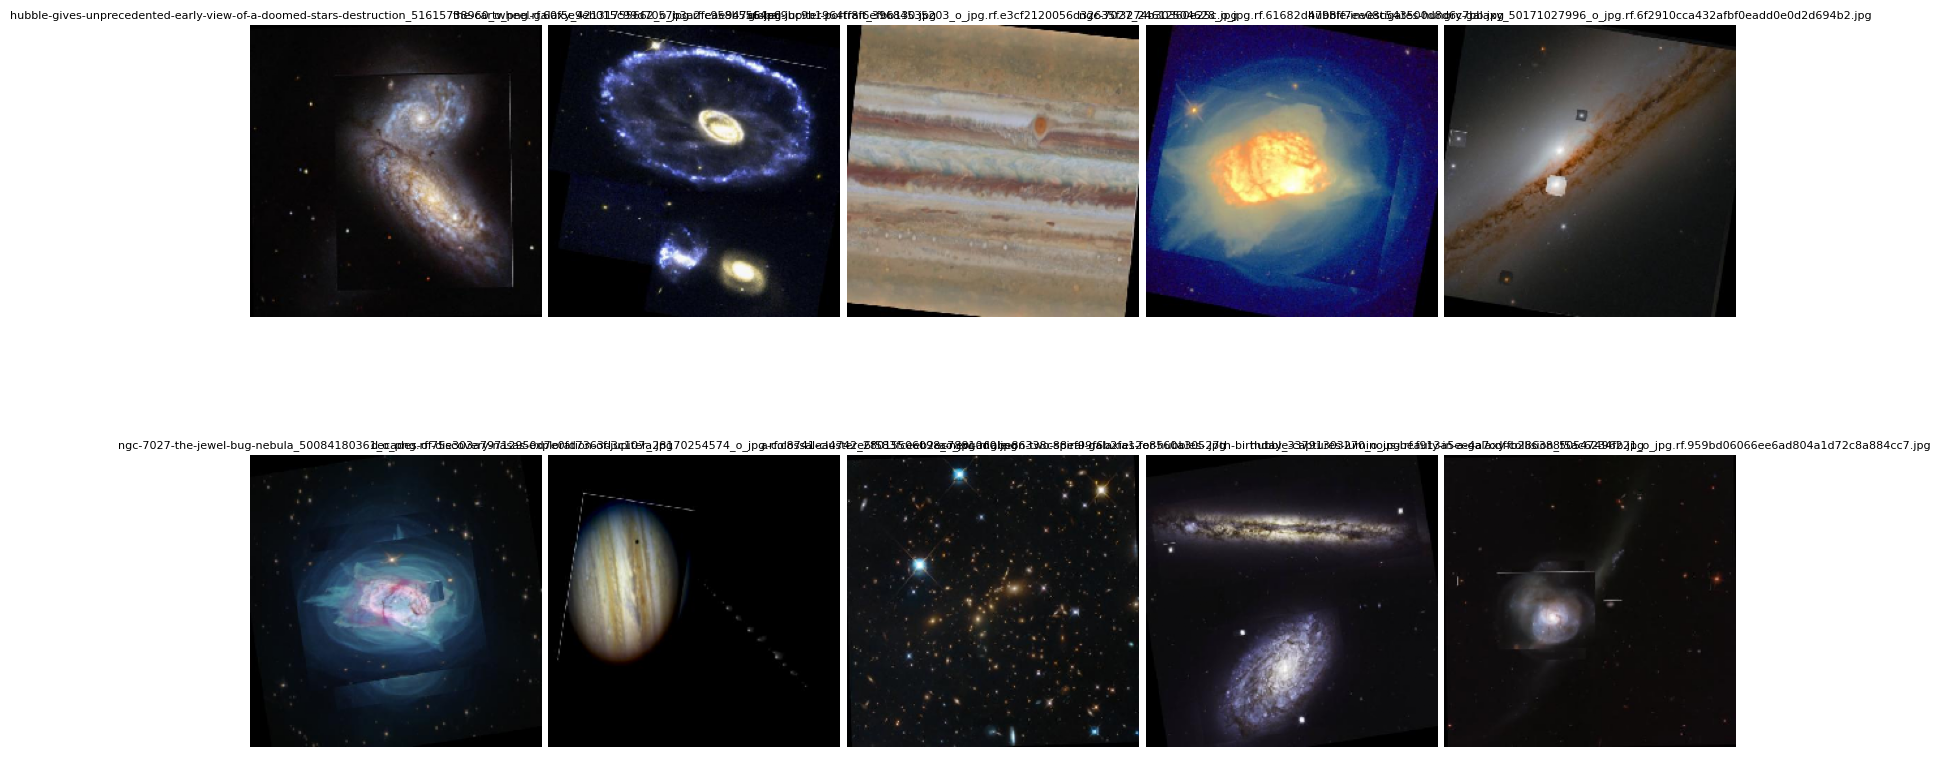

In [11]:
import random

# Visualize some images (adjusted for better layout)
plt.figure(figsize=(15, 10))  # Increase figure size

# Randomly select images to display
num_images_to_display = min(10, len(image_paths))
selected_image_paths = random.sample(image_paths, num_images_to_display)

# Display selected images
for i, image_path in enumerate(selected_image_paths):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns grid
    plt.imshow(img_array / 255.0)
    plt.title(os.path.basename(image_path), fontsize=8)  # Reduce title font size
    plt.axis('off')

plt.tight_layout(pad=0.5)  # Add padding for better spacing
plt.show()

In [12]:
import tensorflow as tf

# Assuming you've defined dataset_path, train_dir, test_dir, valid_dir

# Define image size and batch size
IMG_SIZE = (224, 224)  # Adjust as needed
BATCH_SIZE = 32  # Adjust as needed

# Create data generators for training, testing, and validation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation: random rotations
    width_shift_range=0.2,  # Data augmentation: random horizontal shifts
    height_shift_range=0.2,  # Data augmentation: random vertical shifts
    shear_range=0.2,  # Data augmentation: random shearing transformations
    zoom_range=0.2,  # Data augmentation: random zooming
    horizontal_flip=True,  # Data augmentation: random horizontal flips
    fill_mode='nearest'  # How to fill pixels created during augmentation
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Only normalization for test data

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Only normalization for validation data

# Create data loaders (iterators)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Assuming you have multiple classes
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 381 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [13]:
!nvidia-smi

Wed Nov 13 11:16:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 27.2 MB/s eta 0:00:00


In [15]:
from IPython import display
display.clear_output()
!yolo mode=checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 905, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'export', 'benchmark', 'track', 'train', 'predict'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is o

In [ ]:
!yolo predict model = yolov8n.pt source = 'https://ultralytics.com/images/bus.jpg'

In [19]:
from ultralytics import YOLO

from IPython.display import display, Image

In [20]:
model = YOLO('yolov8n.pt')

In [21]:
results = model.train(data='/content/drive/MyDrive/data.yaml', epochs=10, imgsz=640)


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 25.7MB/s]


Overriding model.yaml nc=80 with nc=47

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/train/labels.cache... 381 images, 6 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 662, len(boxes) = 1574. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 38, len(boxes) = 101. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000196, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.36G      1.886      5.121      1.999         33        640: 100%|██████████| 24/24 [00:13<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         36        101          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.29G      1.618      4.926      1.811         66        640: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         36        101          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.28G      1.517      4.669      1.756         54        640: 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all         36        101     0.0217     0.0833     0.0299     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.29G      1.565      4.367      1.741         50        640: 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         36        101     0.0376      0.327     0.0778     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.3G      1.541      4.141      1.713         39        640: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


                   all         36        101     0.0229      0.462      0.104     0.0708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.29G      1.527      3.915      1.682         37        640: 100%|██████████| 24/24 [00:09<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


                   all         36        101      0.571     0.0893      0.102     0.0632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.29G      1.517      3.751      1.669         57        640: 100%|██████████| 24/24 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         36        101      0.593      0.104     0.0955     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.29G      1.491      3.673      1.656         26        640: 100%|██████████| 24/24 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


                   all         36        101      0.506      0.107      0.103     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.29G      1.496      3.554      1.666         46        640: 100%|██████████| 24/24 [00:09<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         36        101      0.535     0.0833      0.105     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.3G      1.465      3.572      1.639         30        640: 100%|██████████| 24/24 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


                   all         36        101      0.534     0.0819      0.112     0.0716

10 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,014,813 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]


                   all         36        101      0.534     0.0819      0.112     0.0716
          Blue-Neptune          1          1          0          0     0.0474     0.0426
        Distant-Planet          4          7          1          0      0.114     0.0645
            Dust cloud          7          7          0          0      0.338      0.251
                 Earth          2          2          1          0          0          0
     Elliptical-Galaxy          1          1          0          0     0.0383    0.00765
            Far-Galaxy          6         13     0.0905      0.154      0.124     0.0278
        Galaxy-Cluster          4          4      0.194       0.25      0.308      0.277
       Hot Sub-Neptune          1          1          1          0          0          0
          Jupiter-Moon          1          1          1          0      0.111     0.0995
         Jupiter-spots          1          1          1          0     0.0332     0.0332
            Kepler-47

In [22]:
results = model.val()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,014,813 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 38, len(boxes) = 101. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


                   all         36        101      0.533     0.0819      0.112     0.0716
          Blue-Neptune          1          1          0          0     0.0474     0.0426
        Distant-Planet          4          7          1          0      0.113     0.0638
            Dust cloud          7          7          0          0       0.34      0.253
                 Earth          2          2          1          0          0          0
     Elliptical-Galaxy          1          1          0          0     0.0369    0.00737
            Far-Galaxy          6         13      0.087      0.154      0.122     0.0261
        Galaxy-Cluster          4          4      0.196       0.25      0.308      0.277
       Hot Sub-Neptune          1          1          1          0          0          0
          Jupiter-Moon          1          1          1          0      0.111     0.0995
         Jupiter-spots          1          1          1          0     0.0332     0.0332
            Kepler-47

In [23]:
results = model.predict(source="/content/drive/MyDrive/Space Images/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg", save=True, save_txt=False)



image 1/1 /content/drive/MyDrive/Space Images/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg: 640x640 1 Spiral-Galaxy, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3



image 1/1 /content/drive/MyDrive/Space Images/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg: 640x640 1 Spiral-Galaxy, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train4


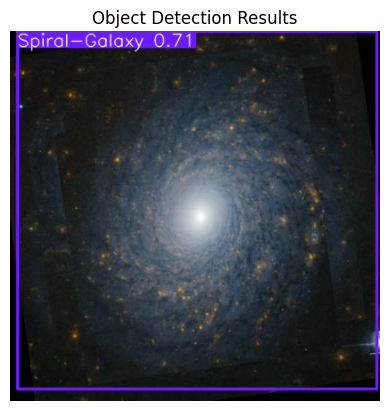

In [24]:
results = model.predict(source="/content/drive/MyDrive/Space Images/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg", save=True, save_txt=False)
for r in results:
    plot_array = r.plot()
    plt.imshow(plot_array)
    plt.title("Object Detection Results")
    plt.axis('off')  # Remove axis ticks
    plt.show()

In [25]:
train_image_dir = os.path.join(extract_path, 'train', 'images')  # Changed to 'images'

# Visualize some images
# Assuming your images are in JPEG format
image_paths = [os.path.join(train_image_dir, filename)
                for filename in os.listdir(train_image_dir) if filename.endswith(('.jpg', '.png'))]  # Filter for common image formats

print(image_paths)

['/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.4bdbe33fcd365abe89dadea9af5d31e5.jpg', '/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.29c9e842247bf5fa8d7d5cf6b09a2702.jpg', '/content/drive/MyDrive/train/images/a-beautiful-whorl_48957786336_o_jpg.rf.b2b8da5640e41135e3df2debfdf6b43d.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.78465d78a5141d506a27e05992997610.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.e35c174410e670242c1fe2c9e7fe63b4.jpg', '/content/drive/MyDrive/train/images/a-colossal-cluster_28015506098_o_jpg.rf.abe86338c88ef99f6b2fa12e8560a305.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.2485065a14973f83e176759616e7adf2.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.35d3e9fd62a4faf3750bc78de496331e.jpg', '/content/drive/MyDrive/train/images/a-diffuse-galaxy_52045267318_o_jpg.rf.50b


image 1/1 /content/drive/MyDrive/train/images/img8_jpg.rf.809ac4111697abb0adeb2c84df12cd45.jpg: 640x640 1 Elliptical-Galaxy, 1 Nebulae, 1 Spiral-Galaxy, 10.9ms
Speed: 4.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/train/images/jupiter-and-its-shrinking-great-red-spot_46616136772_o_jpg.rf.3174138f829c833e41ad09dd9aee4d24.jpg: 640x640 1 Jupiter, 10.5ms
Speed: 3.5ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/train/images/a-lost-galaxy_52046519794_o_jpg.rf.ab07c8af3a5db5b43389df36c3dbce31.jpg: 640x640 1 Far-Galaxy, 1 Spiral-Galaxy, 2 stars, 10.6ms
Speed: 3.4ms preprocess, 10.6ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/train/images/hubble-gets-galactic-dj-vu_51638069811_o_jpg.rf.ce133907770793de1981777585c77c6d.jpg: 640x640 1 Spiral-Galaxy, 39.4ms
Speed: 7.0ms preprocess, 39.4ms inf

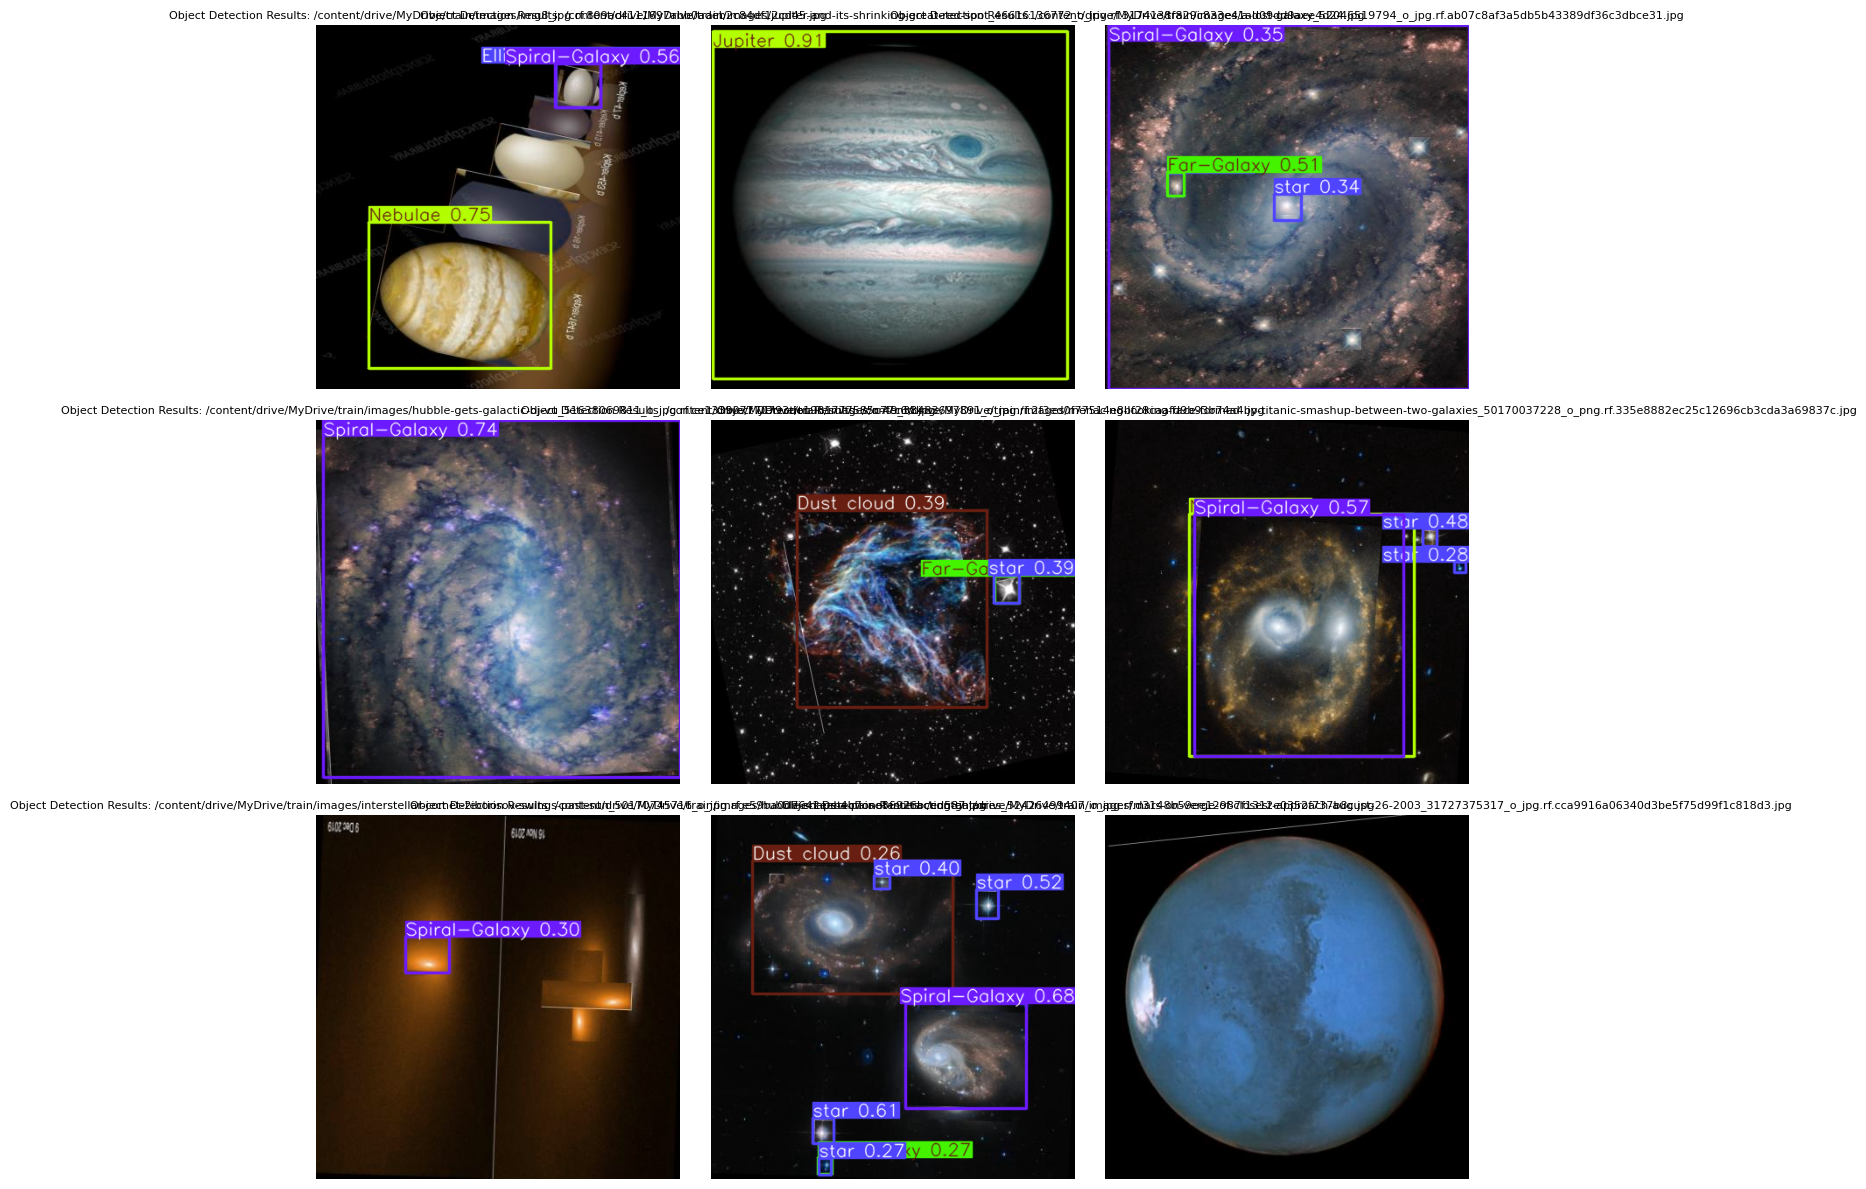

In [26]:
import random
# Randomly select 9 images
selected_images = random.sample(image_paths, 9)
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Adjust figsize as needed

# Loop through the selected images and display in the grid
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(train_image_dir, image_file)
    results = model.predict(source=image_path)

    for r in results:
        plot_array = r.plot()
        row = i // 3  # Calculate row index
        col = i % 3  # Calculate column index
        axes[row, col].imshow(plot_array)
        axes[row, col].set_title(
            "Object Detection Results: " + image_file, fontsize=8
        )  # Adjust fontsize as needed
        axes[row, col].axis("off")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [27]:
results = model.val()

# Print metrics (adjust variable names based on your specific structure)
print("mAP@0.5:", results.box.map)
print("Precision:", results.box.p)
print("Recall:", results.box.r)
print("F1-score:", results.box.f1)

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 38, len(boxes) = 101. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


                   all         36        101      0.533     0.0819      0.112     0.0716
          Blue-Neptune          1          1          0          0     0.0474     0.0426
        Distant-Planet          4          7          1          0      0.113     0.0638
            Dust cloud          7          7          0          0       0.34      0.253
                 Earth          2          2          1          0          0          0
     Elliptical-Galaxy          1          1          0          0     0.0369    0.00737
            Far-Galaxy          6         13      0.087      0.154      0.122     0.0261
        Galaxy-Cluster          4          4      0.196       0.25      0.308      0.277
       Hot Sub-Neptune          1          1          1          0          0          0
          Jupiter-Moon          1          1          1          0      0.111     0.0995
         Jupiter-spots          1          1          1          0     0.0332     0.0332
            Kepler-47